In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2, os
import torchvision.transforms as transforms
import matplotlib.patches as patches
import random
import colorsys

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
dummy_input  = torch.rand(1, 3, 300, 400)

In [60]:
img = Image.open(r"C:\Users\ABansal4\Downloads\pytorch-getting-started\Keypoints-of-humanpose-with-Mask-R-CNN\images\000000000885.jpg")
img = torch.Tensor(np.array(img)).permute(2, 0, 1)
img = img.unsqueeze(0)
img /= 255
print(img.shape)

torch.Size([1, 3, 427, 640])


In [43]:
from torch.autograd import Variable 
dummy_input = Variable(torch.rand(1, 3, 427, 640, device='cpu'))
dummy_input.shape

torch.Size([1, 3, 427, 640])

In [61]:
with torch.no_grad():
    model.eval()
    predictions = model(img)
    print(predictions)

[{'boxes': tensor([[2.8076e+02, 1.8567e+02, 4.1593e+02, 4.0126e+02],
        [5.9463e+02, 2.4189e+01, 6.4000e+02, 2.5618e+02],
        [3.9966e+02, 2.6871e+02, 4.8226e+02, 3.1113e+02],
        [3.0140e+02, 8.6050e+01, 3.9607e+02, 2.3247e+02],
        [4.9775e+02, 1.9459e-01, 5.4692e+02, 1.4241e+01],
        [4.1937e+02, 0.0000e+00, 4.6851e+02, 1.3877e+01],
        [5.4426e+02, 2.6194e-01, 6.1208e+02, 1.5584e+01],
        [3.4679e+02, 0.0000e+00, 3.9459e+02, 1.2294e+01],
        [1.8426e+02, 0.0000e+00, 2.5503e+02, 1.1669e+01],
        [2.5926e+02, 3.0937e-01, 3.3139e+02, 1.2347e+01],
        [2.9039e+02, 1.0200e+02, 4.0247e+02, 3.2077e+02],
        [5.3998e+02, 5.9760e-01, 5.7779e+02, 1.4822e+01],
        [6.9279e+00, 1.3704e-01, 5.7372e+01, 8.4308e+00],
        [5.0932e+01, 1.9018e-01, 1.1134e+02, 9.6215e+00],
        [1.2825e+02, 1.3842e-01, 1.7269e+02, 9.2887e+00],
        [2.4756e+02, 2.0483e+02, 2.8513e+02, 2.4200e+02],
        [3.6482e+02, 1.8380e+02, 4.0481e+02, 2.5201e+02],
   

In [62]:
torch.onnx.export(model=model,               # model being run
                  args=img,                         # model input (or a tuple for multiple inputs)
                  f="fasterrcnn_resnet50_fpn.onnx",   # where to save the model (can be a file or file-like object)
#                   export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=11,          # the ONNX version to export the model to
#                   do_constant_folding=True,  # whether to execute constant folding for optimization
#                   input_names = ['input'],   # the model's input names
#                   output_names = ['output'], # the model's output names,
#                   dynamic_axes={'input' : {0 : 'batch_size'},
#                                'output' : {0 : 'batch_size'}},
                 verbose=True)

graph(%images : Float(1, 3, 427, 640),
      %backbone.body.conv1.weight : Float(64, 3, 7, 7),
      %backbone.body.bn1.weight : Float(64),
      %backbone.body.bn1.bias : Float(64),
      %backbone.body.bn1.running_mean : Float(64),
      %backbone.body.bn1.running_var : Float(64),
      %backbone.body.layer1.0.conv1.weight : Float(64, 64, 1, 1),
      %backbone.body.layer1.0.bn1.weight : Float(64),
      %backbone.body.layer1.0.bn1.bias : Float(64),
      %backbone.body.layer1.0.bn1.running_mean : Float(64),
      %backbone.body.layer1.0.bn1.running_var : Float(64),
      %backbone.body.layer1.0.conv2.weight : Float(64, 64, 3, 3),
      %backbone.body.layer1.0.bn2.weight : Float(64),
      %backbone.body.layer1.0.bn2.bias : Float(64),
      %backbone.body.layer1.0.bn2.running_mean : Float(64),
      %backbone.body.layer1.0.bn2.running_var : Float(64),
      %backbone.body.layer1.0.conv3.weight : Float(256, 64, 1, 1),
      %backbone.body.layer1.0.bn3.weight : Float(256),
      %backb

In [63]:
# with torch.no_grad():
#     model.eval()
#     predictions = model(dummy_input)
#     print(img)

In [64]:
r'python "C:\Program Files (x86)\IntelSWTools\openvino_2020.1.033\deployment_tools\model_optimizer\mo_onnx.py" \
--input_model "C:\Users\ABansal4\Downloads\pytorch-getting-started\torchvision\fasterrcnn_resnet50_fpn.onnx" \
--model_name keypoint_resent50_pytorch --output_dir C:\Users\ABansal4\Downloads\openVINO\keypoint_resent50_pytorch \
--stream_output'

'python "C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.1.033\\deployment_tools\\model_optimizer\\mo_onnx.py" \\\n--input_model "C:\\Users\\ABansal4\\Downloads\\pytorch-getting-started\\torchvision\\fasterrcnn_resnet50_fpn.onnx" \\\n--model_name keypoint_resent50_pytorch --output_dir C:\\Users\\ABansal4\\Downloads\\openVINO\\keypoint_resent50_pytorch \\\n--stream_output'

In [65]:
import onnx
import onnxruntime

onnx_model = onnx.load("fasterrcnn_resnet50_fpn.onnx")
onnx.checker.check_model(onnx_model)


ort_session = onnxruntime.InferenceSession("fasterrcnn_resnet50_fpn.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()


In [68]:
# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img)}
ort_outs = ort_session.run(None, ort_inputs)


# ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
# ort_outs = ort_session.run(None, ort_inputs)
# compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


In [69]:
ort_outs

[array([[2.8075717e+02, 1.8567180e+02, 4.1592923e+02, 4.0125793e+02],
        [5.9462830e+02, 2.4189293e+01, 6.4000000e+02, 2.5617880e+02],
        [3.9965530e+02, 2.6871045e+02, 4.8225577e+02, 3.1112958e+02],
        [3.0140237e+02, 8.6050011e+01, 3.9606854e+02, 2.3247256e+02],
        [4.9775357e+02, 1.9459568e-01, 5.4692114e+02, 1.4241076e+01],
        [4.1937045e+02, 0.0000000e+00, 4.6850562e+02, 1.3876661e+01],
        [5.4426331e+02, 2.6197973e-01, 6.1208350e+02, 1.5583953e+01],
        [3.4679190e+02, 0.0000000e+00, 3.9459091e+02, 1.2293724e+01],
        [1.8425606e+02, 0.0000000e+00, 2.5502562e+02, 1.1668855e+01],
        [2.5925565e+02, 3.0936933e-01, 3.3138925e+02, 1.2347207e+01],
        [2.9038544e+02, 1.0200201e+02, 4.0247427e+02, 3.2077451e+02],
        [5.3998431e+02, 5.9759074e-01, 5.7778955e+02, 1.4822284e+01],
        [6.9278536e+00, 1.3704316e-01, 5.7371620e+01, 8.4308109e+00],
        [5.0931992e+01, 1.9017634e-01, 1.1134016e+02, 9.6214504e+00],
        [1.2825285e+

In [90]:
output_dir = r"C:\Users\ABansal4\Downloads\openVINO\keypoint_resent50_pytorch"
input_shape_str = str(list(img.shape)).replace(' ','')
input_model = r"C:\Users\ABansal4\Downloads\pytorch-getting-started\torchvision\fasterrcnn_resnet50_fpn.onnx"

input_model = "fasterrcnn_resnet50_fpn.onnx"
cmd = 'python "C:\Program Files (x86)\IntelSWTools\openvino\deployment_tools\model_optimizer\mo_onnx.py" \
      --input_model' +  input_model +' --output_dir '+output_dir+' --input_shape '+input_shape_str+' --data_type FP32 --log_level DEBUG'
# import os
os.system(cmd)

2

In [91]:
cmd

'python "C:\\Program Files (x86)\\IntelSWTools\\openvino\\deployment_tools\\model_optimizer\\mo_onnx.py"       --input_modelfasterrcnn_resnet50_fpn.onnx --output_dir C:\\Users\\ABansal4\\Downloads\\openVINO\\keypoint_resent50_pytorch --input_shape [1,3,427,640] --data_type FP32 --log_level DEBUG'

In [52]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open(r"C:\Users\ABansal4\Downloads\pytorch-getting-started\Keypoints-of-humanpose-with-Mask-R-CNN\images\000000000885.jpg")

resize = transforms.Resize([300, 400])
img = resize(img)

img_ycbcr = img.convert('YCbCr')
img_y, img_cb, img_cr = img_ycbcr.split()

to_tensor = transforms.ToTensor()
img_y = to_tensor(img)
img_y = img_y.unsqueeze(0)

In [53]:
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_y)}
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[0]

In [59]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(image.permute(1,2,0))
    return ax

<Figure size 432x288 with 0 Axes>

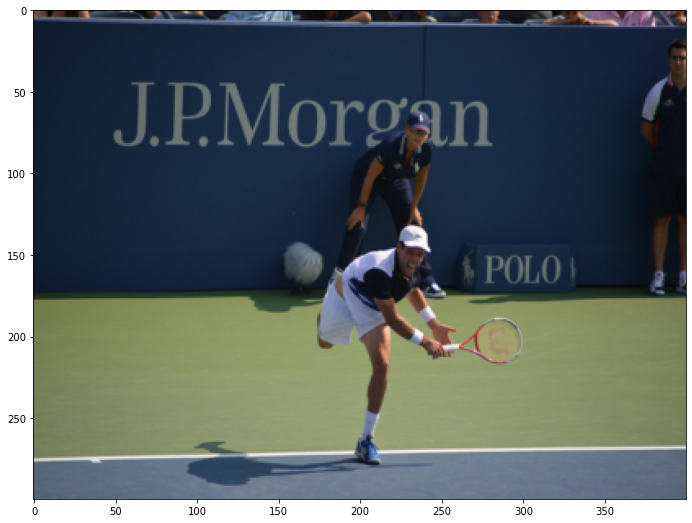

In [61]:
plot_image(img_y[0])

In [28]:
img_out_y = Image.fromarray(np.uint8((img_out_y[0] * 255.0).clip(0, 255)[0]), mode='L')

# get the output image follow post-processing step from PyTorch implementation
final_img = Image.merge(
    "YCbCr", [
        img_out_y,
        img_cb.resize(img_out_y.size, Image.BICUBIC),
        img_cr.resize(img_out_y.size, Image.BICUBIC),
    ]).convert("RGB")

# Save the image, we will compare this with the output image from mobile device
final_img.save("./_static/img/cat_superres_with_ort.jpg")

NameError: name 'np' is not defined